# Gráfico de Setores

Embora o uso deste gráfico seja objeto de críticas por especialistas em visualização de dados, é muito utilizado em relatórios gerenciais e na mídia. Ao utilizar este gráfico o auditor deve evitar usar versões tridimensionais bem como destacar os setores ou usá-lo em perspectiva de forma que pareça uma elipse.

Para a construção de gráficos de setores no R, utilizamos a função **`pie()`**.

Os dados que utilizaremos são provenientes do livro Análise Financeira de Balanços: Uma Abordagem Básica e Gerencial do Dante C. Matarazzo e referem-se ao balanço patrimonial levantados em três exercícios. Os dados estão no arquivo `balanco.csv`.

Suponha que desejemos construir um gráfico de setores para representar a composição do ativo circulante de uma empresa que tenha seu balanço estruturado da seguinte forma:

In [1]:
setwd('C:\\Users\\Marcos\\Documents\\GitHub\\Usando-R-em-Auditoria\\dados')
balanco <- read.csv2("balanco.csv")
balanco

Conta,Classe,Subclasse,x31.12.01,x31.12.02,x31.12.03
Disponivel,A,ACIRC,34665,26309,25000
Aplic. Fin.,A,ACIRC,128969,80915,62000
Clientes,A,ACIRC,1045640,1122512,1529061
Estoques,A,ACIRC,751206,1039435,1317514
Investimentos,A,APERMAN,72250,156475,228075
Imobilizado,A,APERMAN,693448,1517508,2401648
Diferido,A,APERMAN,NA,40896,90037
Fornecedores,P,PCIRC,708536,639065,688791
Outras Obrig.,P,PCIRC,275623,289698,433743
Emprest. Banc.,P,PCIRC,66165,83429,158044


A construção do gráfico é feita da seguinte forma:

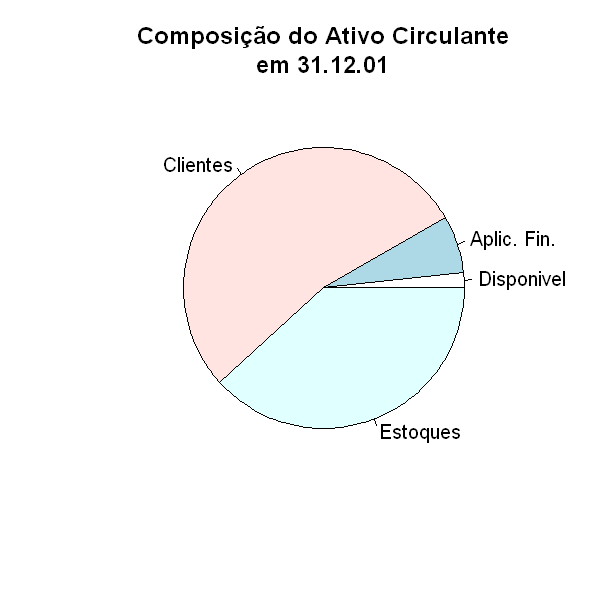

In [4]:
options(repr.plot.width = 5, repr.plot.height = 5) 
ativo_circ <- subset(balanco, Subclasse == "ACIRC")
pie(ativo_circ$x31.12.01,
   labels=ativo_circ$Conta,
   main="Composição do Ativo Circulante\nem 31.12.01")

Talvez o leitor a esta altura se pergunte: mas qual é a participação de cada conta no grupo? Porquê não consta do gráfico? A resposta a esta pergunta é que os gráficos não se destinam, a princípio, a apresentar detalhes numéricos. Estes, o leitor poderá sempre consultar em uma tabela ou mesmo calculá-los. No nosso caso, para o exercício de 2001:

In [7]:
round(ativo_circ$x31.12.01 / sum(ativo_circ$x31.12.01) * 100, 2)

[1]  1.77  6.58 53.34 38.32

Indicando que o Disponível corresponde a 1,77% do Ativo Circulante, as Aplic. Financeiras correspondem a 6,58%, Clientes correspondem a 53,34% e Estoques a 38,32%.

Mas, caso seja absolutamente necessário mostrar os percentuais nos gráficos, isto pode ser feito da seguinte maneira:

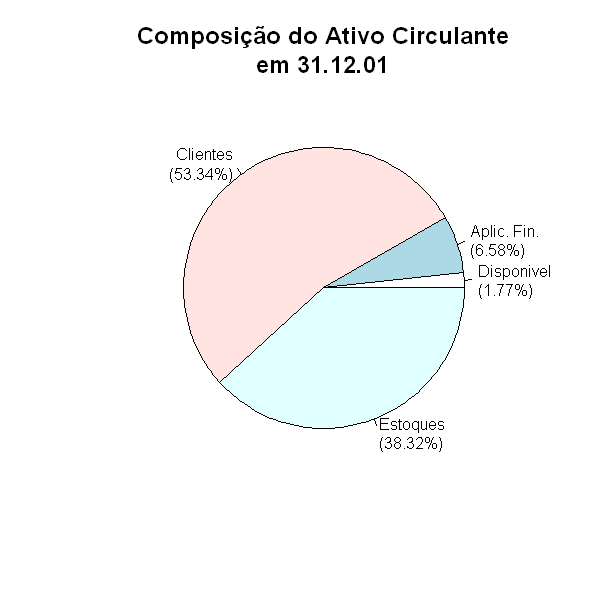

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5) 
ativo_circ <- subset(balanco, Subclasse == "ACIRC")
participacao<- round(ativo_circ$x31.12.01 / sum(ativo_circ$x31.12.01) * 100, 2)

pie(ativo_circ$x31.12.01,
   labels=paste(ativo_circ$Conta,'\n', '(', participacao, '%', ')', sep=''),
   main="Composição do Ativo Circulante\nem 31.12.01",
   cex=0.8)

Um gráfico objetiva transmitir uma idéia geral dos dados, comparar os valores apresentados, verificar o relacionamento entre os dados, verificar a existência de valores discrepantes, de simetria, tendência, etc.

É importante frisar que sempre existirá uma alternativa melhor que apresentar dados utilizando gráficos de setores. Assim, sempre que possível os evite! Recomendo a leitura do texto [*Save the Pies for Dessert*](http://www.perceptualedge.com/articles/visual_business_intelligence/save_the_pies_for_dessert.pdf) do Stephen Few, sobre os gráficos de setores. Para uma opinião em contrário consultar o artigo do Robert Kosara [*In Defense of Pie Charts*](https://eagereyes.org/criticism/in-defense-of-pie-charts).